# DATA SCIENCE PROJECT

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

In [41]:
import bs4
import pandas as pd

# Replace the file path with the actual path to your HTML file
file_path = "C:/Users/gulde/Desktop/Spotify Playlist.html"

# Define the column names
data = ["#", "Song", "Artist", "Popularity", "BPM", "Genres", "Parent Genres", "Album", "Album Date", "Time", "Dance", "Energy", "Acoustic", "Instrumental", "Happy", "Speech", "Live", "Loud", "Key", "Time Signature", "Added At", "Spotify Track Id", "Album Label", "Camelot"]

# Read the local HTML file
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = bs4.BeautifulSoup(html_content, "html.parser")

target_rows = soup.find_all('tr', {'data-id-song': True})

# Create an empty list to store dictionaries
data_list = []

# Iterate over each row in target_rows
for row in target_rows:
    # Create a dictionary for each row
    row_dict = {}
    
    # Iterate over each element in data and each corresponding element in the row
    for elem, x_element in zip(data, row):
        # Add the pair to the dictionary
        row_dict[elem] = x_element.get_text(strip=True)

    # Append the dictionary to the list
    data_list.append(row_dict)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Update for numerical columns
selected_columns = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Time Signature']

# Convert 'Loud' column to float and remove 'db'
df['Loud'] = df['Loud'].astype(str).str.replace(' db', '').astype(float)
# Convert specified columns to numeric
df[selected_columns] = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Select only the specified numerical columns
numerical_summary = df[selected_columns].describe()

# Print the DataFrame
print(df)

# Print the statistical summary of numerical columns
print(numerical_summary)


         #                        Song                    Artist  Popularity  \
0        1               Hallice Halim            Konuya Fransız          47   
1        2      imkansız bir aşk denir        yunusemre,Şekersiz          67   
2        3       Beni Kendinden Kurtar     Perdenin Ardındakiler          66   
3        4  En Güzel Yaşımdı - Akustik                  Şekersiz           0   
4        5           Uyursam Geçer Mi?            Eskitilmiş Yaz          60   
...    ...                         ...                       ...         ...   
1457  1458                 Yan Kaderim  Soner Avcu,Pelin Orhuner          37   
1458  1459     Bir Ömür Daha - Akustik                 Melis Fis          42   
1459  1460                  Old Memory             Martin Czerny          47   
1460  1461         Sana Neler Edeceğim               Ajda Pekkan          50   
1461  1462                Hep Yaşın 19                       MFÖ          57   

      BPM                              

# FINDINGS PART 1

## 1.1

C:\Users\gulde\AppData\Local\Temp\ipykernel_47636\2928945463.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(merged_df.index, rotation=45, ha='right')


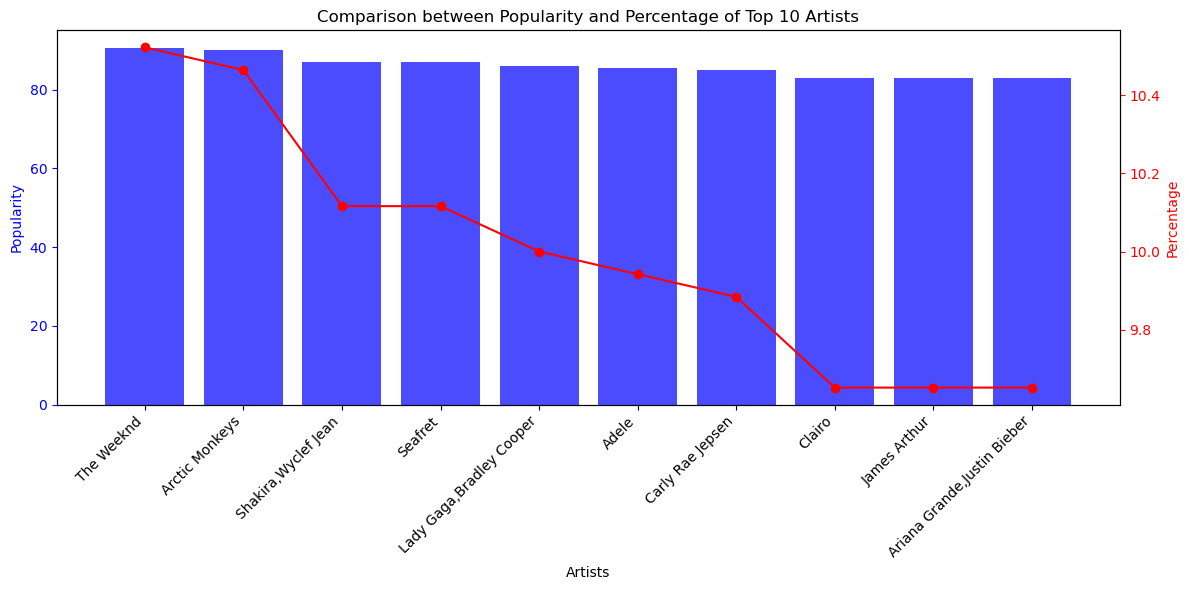

In [42]:
import matplotlib.pyplot as plt

# Assuming df is the DataFrame created from the HTML file
# Assuming 'Artist' and 'Popularity' are the columns containing artist and popularity information

# Group by artist and calculate the mean popularity for each artist
artist_popularity = df.groupby('Artist')['Popularity'].mean()

# Get the top 10 popular artists
top_10_artists = artist_popularity.sort_values(ascending=False).head(10)

# Split multiple artists into separate rows
artists_df = df['Artist'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Artist')

# Strip leading and trailing whitespaces from artist values
artists_df = artists_df.str.strip()

# Drop rows with empty or missing artist values
artists_df = artists_df[artists_df != '']

# Count the occurrences of each artist
artist_counts = artists_df.value_counts()

# Combine counts into a DataFrame
result_artist_df = pd.DataFrame({'Count': artist_counts})

# Merge DataFrames on the common column (Artist)
merged_df = pd.merge(top_10_artists, result_artist_df, how='left', left_index=True, right_index=True)

# Calculate the percentage of popularity for each artist
merged_df['Percentage'] = (merged_df['Popularity'] / merged_df['Popularity'].sum()) * 100

# Plot the comparison graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for popularity
ax1.bar(merged_df.index, merged_df['Popularity'], color='b', alpha=0.7, label='Popularity')
ax1.set_xlabel('Artists')
ax1.set_ylabel('Popularity', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(merged_df.index, rotation=45, ha='right')

# Create a second y-axis to show percentage
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['Percentage'], color='r', marker='o', label='Percentage')
ax2.set_ylabel('Percentage', color='r')
ax2.tick_params('y', colors='r')

# Show the plot
plt.title('Comparison between Popularity and Percentage of Top 10 Artists')
fig.tight_layout()
plt.show()


## 1.2

Mean Popularity of All Songs: 33.54


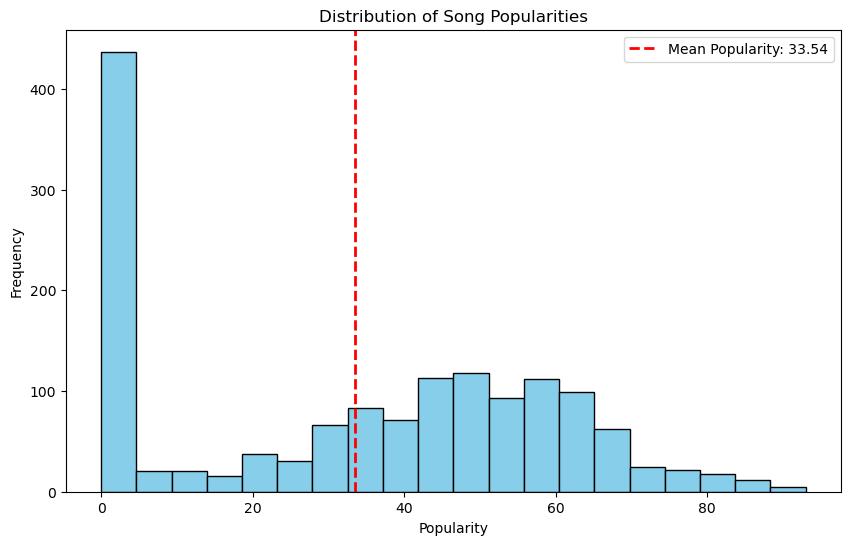

In [43]:
import matplotlib.pyplot as plt

# Calculate the mean popularity of all songs
mean_popularity_all = df['Popularity'].mean()

# Print the mean popularity
print(f"Mean Popularity of All Songs: {mean_popularity_all:.2f}")

# Create a histogram of all song popularities
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Popularities')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Add a vertical line for the mean popularity
plt.axvline(mean_popularity_all, color='red', linestyle='dashed', linewidth=2, label=f'Mean Popularity: {mean_popularity_all:.2f}')
plt.legend()

# Show the plot
plt.show()


## 1.3

In [44]:
import pandas as pd

# Assuming df is the DataFrame created from the previous code
# Assuming 'Artist' and 'Popularity' are the columns containing artist and popularity information

# Group by artist and calculate the mean popularity for each artist
artist_popularity = df.groupby('Artist')['Popularity'].mean()

# Get the top 10 popular artists
top_4_artists = artist_popularity.sort_values(ascending=False).head(4)

# Print the top 10 popular artists
print("Top 4 Popular Artists:")
print(top_4_artists)


Top 4 Popular Artists:
Artist
The Weeknd             90.5
Arctic Monkeys         90.0
Shakira,Wyclef Jean    87.0
Seafret                87.0
Name: Popularity, dtype: float64


## 1.4

In [45]:
import pandas as pd

# Assuming df is the DataFrame created from your HTML file

# Split multiple artists into separate rows
artists_df = df['Artist'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Artist')

# Strip leading and trailing whitespaces from artist values
artists_df = artists_df.str.strip()

# Drop rows with empty or missing artist values
artists_df = artists_df[artists_df != '']

# Count the occurrences of each artist
artist_counts = artists_df.value_counts()

# Combine counts into a DataFrame
result_artist_df = pd.DataFrame({'Count': artist_counts})

# Sort the DataFrame by count in descending order
result_artist_df = result_artist_df.sort_values(by='Count', ascending=False)

# Select the top 5 most popular artists
top_artists = result_artist_df.head(4)

# Print the result
print("Top 4 Most Listened Artists:")
for artist, count in top_artists.iterrows():
    print(f"{artist}: {count['Count']} repeat{'s' if count['Count'] > 1 else ''}")


Top 4 Most Listened Artists:
Pera: 76 repeats
Toygar Işıklı: 47 repeats
maNga: 38 repeats
Pinhani: 32 repeats


# FINDINGS PART 2

## 2.1

In [46]:
import pandas as pd

# Assuming df is the DataFrame created from your HTML file

# Split multiple genres into separate rows
genres_df = df['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')

# Strip leading and trailing whitespaces from genre values
genres_df = genres_df.str.strip()

# Drop rows with empty or missing genre values
genres_df = genres_df[genres_df != '']

# Replace 'Unknown' with NaN in the 'Genre' column
genres_df.replace('Unknown', pd.NA, inplace=True)

# Count the occurrences of each genre
genre_counts = genres_df.value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / len(genres_df)) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': genre_counts, 'Percentage': genre_percentages})

# Select the top 5 most popular genres
top_genres = result_df.head(4)

# Print the result
print("Top 4 Most Popular Genres:")
print(top_genres)

Top 4 Most Popular Genres:
                           Count  Percentage
Genre                                       
turkish rock                 737   27.407958
turkish pop                  412   15.321681
turkish alt pop              219    8.144292
turkish singer-songwriter    121    4.499814


## 2.2

In [47]:
import json
from collections import Counter
import pandas as pd

# Path to the JSON file
json_file_path = r'C:\Users\gulde\Desktop\my_spotify_data\Spotify Technical Log Information\OnRepeatContents.json'

# Read JSON file
with open(json_file_path, 'r', encoding='utf-8') as file:
    json_content = json.load(file)

# Extract track IDs from the JSON content without the 'spotify:track:' prefix
track_ids_list_json = [track_id.split(':')[-1] for item in json_content for track_id in item.get('message_contents', [])]

# Assuming df is your DataFrame
# ...

# Count the occurrences of each track ID using Counter for JSON data
track_counts_json = Counter(track_ids_list_json)

# Get the top 10 most repeated track IDs from JSON data
top_10_tracks_json = track_counts_json.most_common(5)

# Function to find song information for a given track ID
def find_song_info(track_id):
    # Check if the track_id exists in the DataFrame
    if any(df['Spotify Track Id'] == track_id):
        return df[df['Spotify Track Id'] == track_id].iloc[0]
    else:
        return None

# Display the result
print("\nTop 4 Most Repeated Songs (search contents):")
for track_id, count in top_10_tracks_json:
    # Find song information for the current track ID
    song_info = find_song_info(track_id)
    
    # Print the result only if found in DataFrame
    if song_info is not None:
        print(f"{track_id}: {count} occurrence{'s' if count > 1 else ''} - {song_info['Song']} by {song_info['Artist']}")



Top 4 Most Repeated Songs (search contents):
2seLnFEenQIMQOaDhwMRaS: 28 occurrences - Gitmiyor Gözümden by 13. Vagon
7dLTVIHgFbQ0A16ZICphKM: 28 occurrences - Saat Oniki by Aslı Demirer
61IsztUa3EPy7L0VyfUCAg: 28 occurrences - It Only Gets Much Worse by Nate Ruess
085eUfuXIbnbFWWEnhVqRO: 28 occurrences - Yürüyorum by Can Algeç


## 2.3

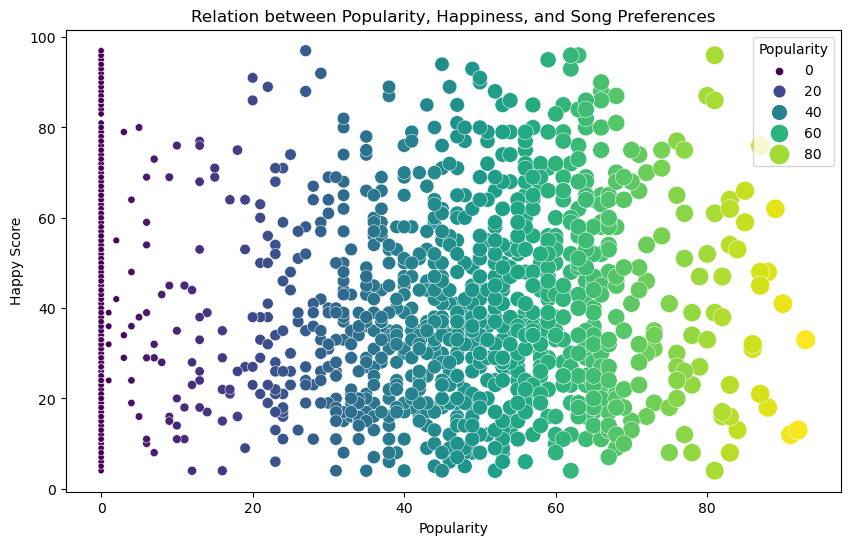

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame
# Extract relevant columns
happiness_data = df[['Song', 'Artist', 'Popularity', 'Happy']]

# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Happy', data=happiness_data, hue='Popularity', palette='viridis', size='Popularity', sizes=(20, 200))
plt.title('Relation between Popularity, Happiness, and Song Preferences')
plt.xlabel('Popularity')
plt.ylabel('Happy Score')
plt.show()

## 2.4

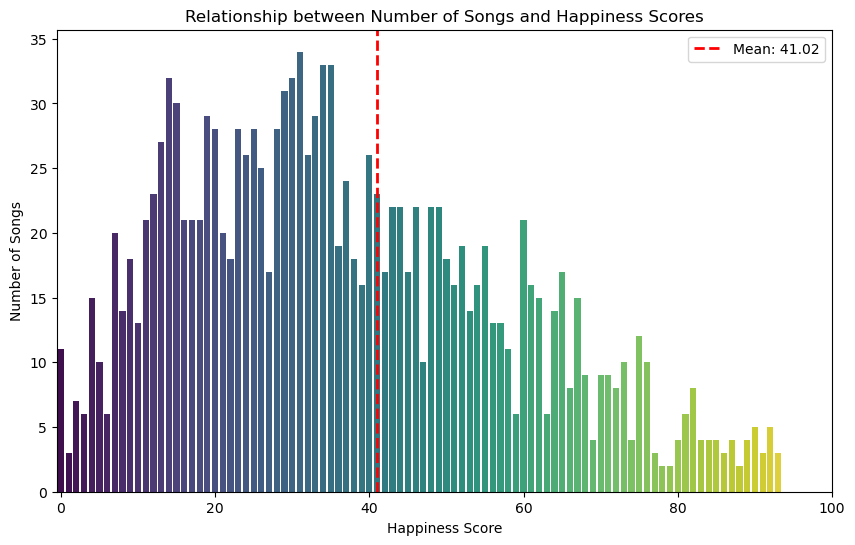

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Extract relevant columns for analysis
happiness_data = df[['Happy', 'Song']]

# Group by happiness scores and count the number of songs for each score
happiness_counts = happiness_data['Happy'].value_counts().sort_index()

# Plot the relationship between the number of songs and happiness scores
plt.figure(figsize=(10, 6))
sns.barplot(x=happiness_counts.index, y=happiness_counts.values, palette='viridis')
plt.title('Relationship between Number of Songs and Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Songs')

# Set custom x-axis ticks and labels
custom_ticks = [0, 20, 40, 60, 80, 100]  # Adjust as needed
plt.xticks(custom_ticks, custom_ticks)

# Calculate and plot the mean value vertically
mean_happiness = happiness_data['Happy'].mean()
plt.axvline(mean_happiness, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_happiness:.2f}')

# Ensure happiness scores are displayed in ascending order
plt.legend()
plt.show()



# FINDINGS PART 3

## 3.1

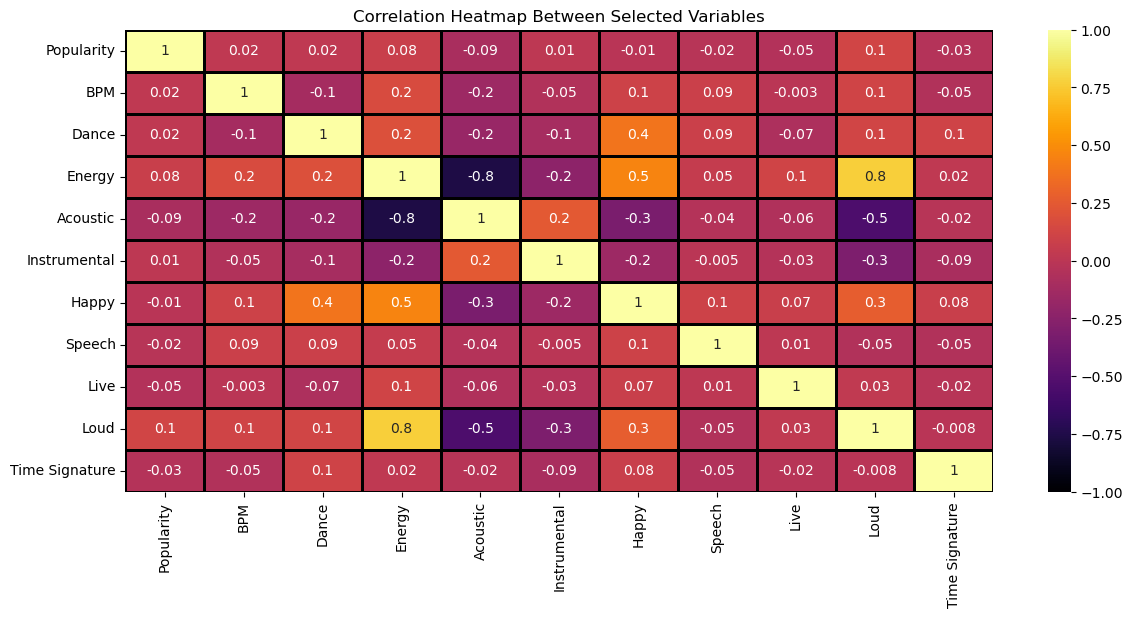

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select relevant columns for correlation analysis
columns_for_heatmap = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Time Signature']

# Calculate correlation matrix
corr_df = df[columns_for_heatmap].corr(method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a heatmap
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")

# Set title
heatmap.set_title("Correlation Heatmap Between Selected Variables")

# Rotate x-axis labels for better visibility
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

# Findings Part 4

## 4.1

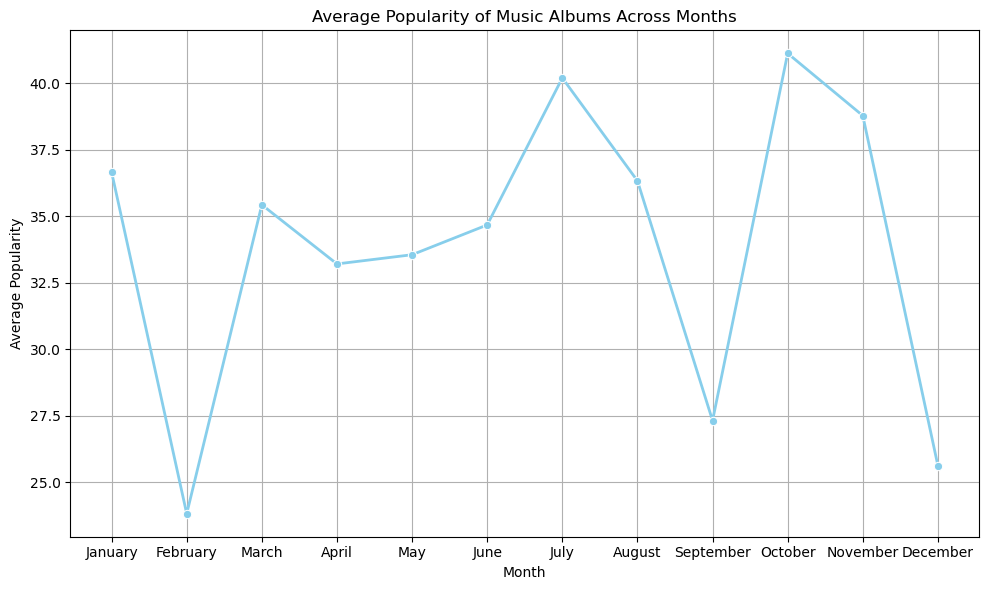

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Album Date' column is in datetime format
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Extract month from the 'Album Date' column
df['Month'] = df['Album Date'].dt.month_name()

# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by month and calculate the average popularity
average_popularity_by_month = df.groupby('Month')['Popularity'].mean().reindex(months_order)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_popularity_by_month.index, y=average_popularity_by_month.values, marker='o', color='skyblue', linewidth=2)

# Adding title and labels
plt.title('Average Popularity of Music Albums Across Months')
plt.xlabel('Month')
plt.ylabel('Average Popularity')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.2 

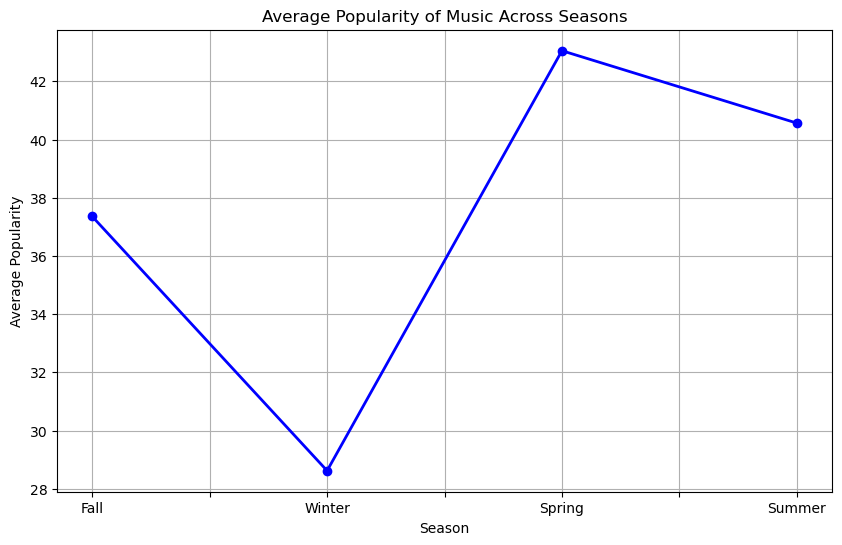

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Added At' column is in datetime format
df['Added At'] = pd.to_datetime(df['Added At'])

# Define a function to map months to seasons
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

# Create a new column 'Season' by applying the function to the 'Month' column
df['Season'] = df['Added At'].dt.month_name().apply(get_season)

# Define the order of seasons
seasons_order = ['Fall', 'Winter', 'Spring', 'Summer']

# Group by season and calculate the average popularity
average_popularity_by_season = df.groupby('Season')['Popularity'].mean().reindex(seasons_order)

# Plotting
plt.figure(figsize=(10, 6))
average_popularity_by_season.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('Average Popularity of Music Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Popularity')

# Show the plot
plt.grid(True)
plt.show()


## 4.3

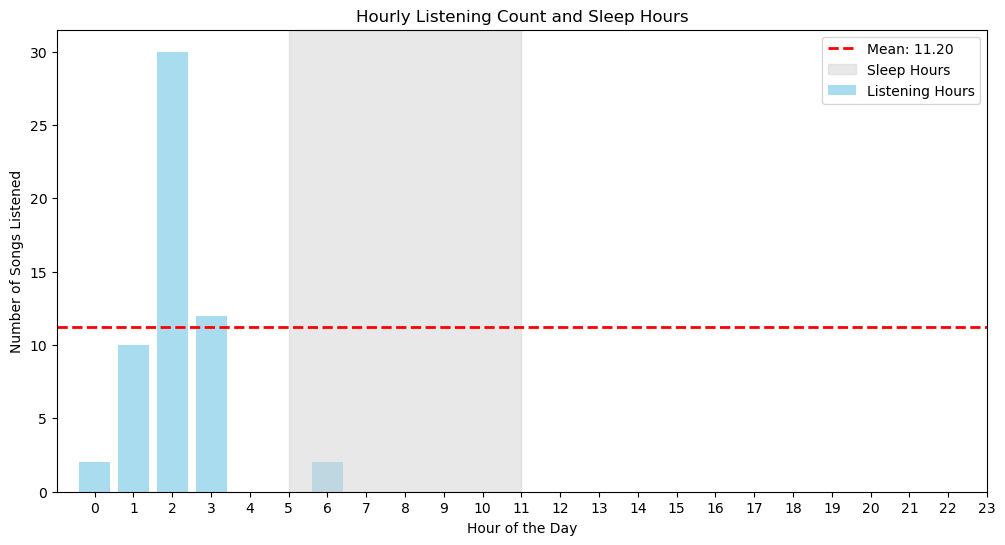

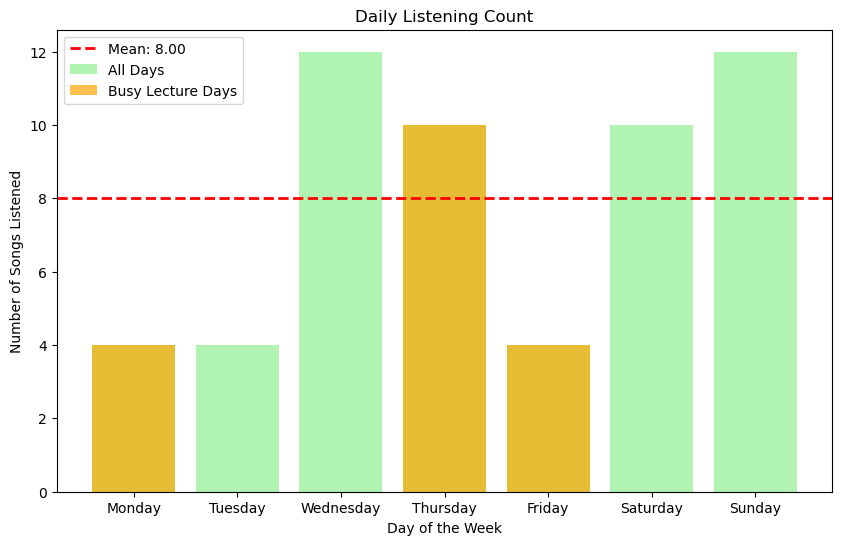

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from datetime import datetime

# Load JSON data
json_file_path = r'C:\Users\gulde\Desktop\my_spotify_data\Spotify Technical Log Information\OnRepeatContents.json'
with open(json_file_path, 'r', encoding='utf-8') as file:
    json_content = json.load(file)

# Create a DataFrame
df2 = pd.DataFrame([{'timestamp_utc': item['timestamp_utc'], 'message_contents': item.get('message_contents', [])} for item in json_content])

# Convert timestamp to datetime
df2['timestamp_utc'] = pd.to_datetime(df2['timestamp_utc'])

# Extract hour and day of the week
df2['hour'] = df2['timestamp_utc'].dt.hour
df2['day_of_week'] = df2['timestamp_utc'].dt.day_name()

# Analyze listening patterns
hourly_listening_count = df2.groupby('hour').size()
daily_listening_count = df2.groupby('day_of_week').size()

# Define sleep hours (adjust based on your sleep schedule)
sleep_start_hour = 5
sleep_end_hour = 11

# Calculate average counts
average_hourly_listening = hourly_listening_count.mean()
average_daily_listening = daily_listening_count.mean()

# Plot hourly listening count
plt.figure(figsize=(12, 6))
plt.bar(hourly_listening_count.index, hourly_listening_count.values, color='skyblue', alpha=0.7, label='Listening Hours')
plt.axhline(average_hourly_listening, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {average_hourly_listening:.2f}')

# Highlight sleep hours
plt.axvspan(sleep_start_hour, sleep_end_hour, color='lightgray', alpha=0.5, label='Sleep Hours')

plt.title('Hourly Listening Count and Sleep Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Songs Listened')
plt.xticks(range(24))
plt.legend()
plt.show()

# Plot daily listening count
plt.figure(figsize=(10, 6))
plt.bar(daily_listening_count.reindex(days_order).index, daily_listening_count.reindex(days_order).values, color='lightgreen', alpha=0.7, label='All Days')
plt.bar(lecture_days, lecture_counts, color='orange', alpha=0.7, label='Busy Lecture Days')
plt.axhline(average_daily_listening, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {average_daily_listening:.2f}')
plt.title('Daily Listening Count')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Songs Listened')
plt.legend()
plt.show()


# 4.4

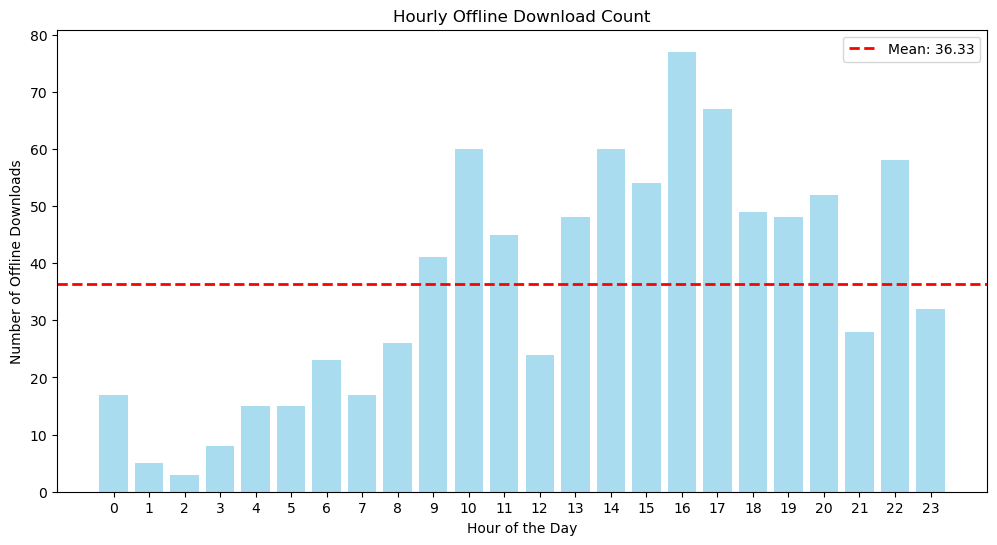

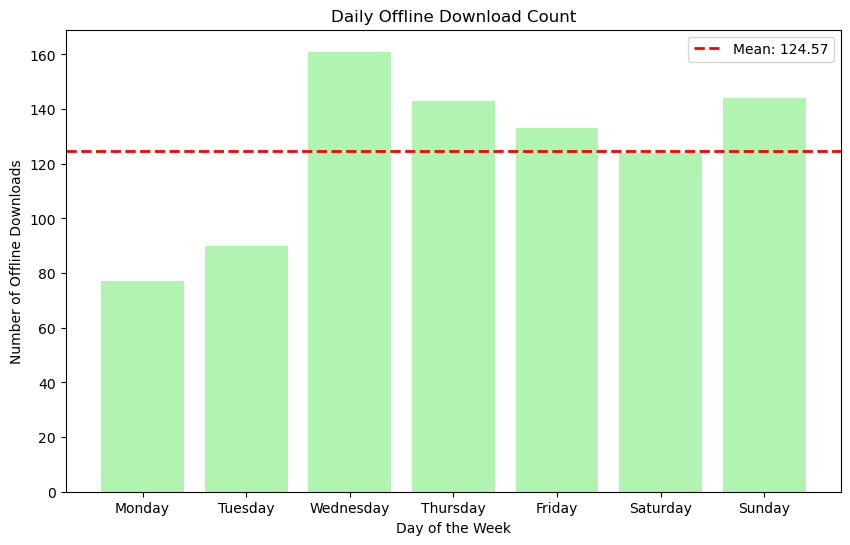

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter

# Load JSON data
json_file_path = r'C:\Users\gulde\Desktop\my_spotify_data\Spotify Technical Log Information\OfflineReport_Hourly.json'
with open(json_file_path, 'r', encoding='utf-8') as file:
    offline_report_data = json.load(file)

# Create a DataFrame
df_offline_report = pd.DataFrame(offline_report_data)

# Convert timestamp to datetime
df_offline_report['timestamp_utc'] = pd.to_datetime(df_offline_report['timestamp_utc'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

# Drop rows with NaT (Not a Timestamp) values, if any
df_offline_report = df_offline_report.dropna(subset=['timestamp_utc'])

# Extract hour and day of the week
df_offline_report['hour'] = df_offline_report['timestamp_utc'].dt.hour
df_offline_report['day_of_week'] = df_offline_report['timestamp_utc'].dt.day_name()

# Analyze offline download patterns
hourly_offline_download_count = df_offline_report.groupby('hour').size()
daily_offline_download_count = df_offline_report.groupby('day_of_week').size()

# Calculate mean counts
mean_hourly_offline_download = hourly_offline_download_count.mean()
mean_daily_offline_download = daily_offline_download_count.mean()

# Plot hourly offline download count
plt.figure(figsize=(12, 6))
plt.bar(hourly_offline_download_count.index, hourly_offline_download_count.values, color='skyblue', alpha=0.7)
plt.axhline(mean_hourly_offline_download, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_hourly_offline_download:.2f}')
plt.title('Hourly Offline Download Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Offline Downloads')
plt.xticks(range(24))
plt.legend()
plt.show()

# Plot daily offline download count
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
plt.bar(daily_offline_download_count.reindex(days_order).index, daily_offline_download_count.reindex(days_order).values, color='lightgreen', alpha=0.7)
plt.axhline(mean_daily_offline_download, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_daily_offline_download:.2f}')
plt.title('Daily Offline Download Count')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Offline Downloads')
plt.legend()
plt.show()
